In [ ]:
import numpy as np
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

# raw_dir = "C:\\Users\\ikang7\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
raw_dir = "F:\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
window_size = 350
transition_point = 0.2

trial_pool = [1, 2, 3]
subject_pool = ["06", "07", "08", "09", "10", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "23", "24", "25", "27", "28"]
mode_pool = ["RD2", "RD3", "RD4", "RD5"]
# mode_pool = ["RA2", "RA3", "RA4", "RA5", "RD2", "RD3", "RD4", "RD5","SA1", "SA2", "SA3", "SA4", "SD1", "SD2", "SD3", "SD4"]
leg_pool = ["L"]

signal_t1 = []
signal_t2 = []
total_signal_t1 = []
total_signal_t2 = []

# Reading Data Files
for subject in subject_pool:
    for mode in mode_pool:
        for trial in trial_pool:
            for starting_leg in leg_pool:
                data_path = raw_dir+"AB"+subject+"_"+str(mode)+"_S2_"+str(starting_leg)+"_T"+str(trial)+".csv"

                if os.path.exists(data_path) == 1:
                    for data_read_path in glob.glob(data_path):
                        data = pd.read_csv(data_read_path, header=0)
                        feature_data = data.iloc[:, :-3].to_numpy()
                        mode_label = data.iloc[:, -3].to_numpy()
              
                transition_mode_diff = np.where(np.diff(np.transpose(mode_label))!=0)[0]               
                transition_idx_1 = np.arange(0, transition_mode_diff[0]+1)
                transition_idx_2 = np.arange(transition_mode_diff[1]+1, len(mode_label))
                
                transition_1 = feature_data[transition_idx_1]
                transition_2 = feature_data[transition_idx_2]
                
                signal_t1.append(signal.resample(transition_1,1000))
                signal_t2.append(signal.resample(transition_2,1000))

    average_signal_t1 = np.zeros((np.shape(signal_t1)[1], np.shape(signal_t1)[2]))   
    average_signal_t2 = np.zeros((np.shape(signal_t2)[1], np.shape(signal_t2)[2]))
    
    for ii in np.arange(0, np.shape(signal_t1)[0]):
        average_signal_t1 = average_signal_t1 + np.array(signal_t1[ii])
        average_signal_t2 = average_signal_t2 + np.array(signal_t2[ii])
    average_signal_t1 = average_signal_t1 / np.shape(signal_t1)[0]
    average_signal_t2 = average_signal_t2 / np.shape(signal_t2)[0]
   
    vec = np.ones((average_signal_t1.shape[1], 4))
    for ii in np.arange(0,np.shape(average_signal_t1)[1]):
        vec[ii,0] = np.max(average_signal_t1[:,ii])
        vec[ii,1] = np.min(average_signal_t1[:,ii])
        vec[ii,2] = np.max(average_signal_t2[:,ii])
        vec[ii,3] = np.min(average_signal_t2[:,ii])                
    average_signal_t1 = (average_signal_t1-vec[:,1])/(vec[:,0]-vec[:,1])
    average_signal_t2 = (average_signal_t2-vec[:,3])/(vec[:,2]-vec[:,3])

    total_signal_t1.append(average_signal_t1)
    total_signal_t2.append(average_signal_t2)

In [82]:
data_t1 = np.zeros((np.shape(total_signal_t1)[1], np.shape(total_signal_t1)[2]))   
data_t2 = np.zeros((np.shape(total_signal_t2)[1], np.shape(total_signal_t2)[2]))

for ii in np.arange(0, np.shape(total_signal_t1)[0]):
    data_t1 = data_t1 + np.array(total_signal_t1[ii])
    data_t2 = data_t2 + np.array(total_signal_t2[ii])
data_t1 = data_t1/np.shape(total_signal_t1)[0]
data_t2 = data_t2/np.shape(total_signal_t2)[0]

vec = np.ones((data_t1.shape[1], 4))
for ii in np.arange(0,np.shape(data_t1)[1]):
    vec[ii,0] = np.max(data_t1[:,ii])
    vec[ii,1] = np.min(data_t1[:,ii])
    vec[ii,2] = np.max(data_t2[:,ii])
    vec[ii,3] = np.min(data_t2[:,ii])                
data_t1 = (data_t1-vec[:,1])/(vec[:,0]-vec[:,1])
data_t2 = (data_t2-vec[:,3])/(vec[:,2]-vec[:,3])

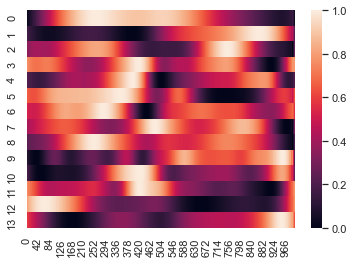

In [83]:
ax = sns.heatmap(np.transpose(data_t1))

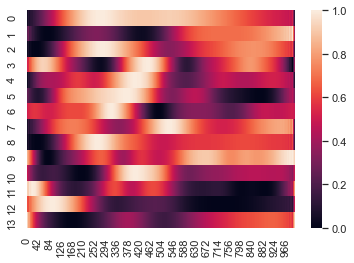

In [84]:
ax = sns.heatmap(np.transpose(data_t2))

In [85]:
print(data_t1[0,0])
print(data_t2[0,0])

0.01403586397316
0.05583329058578554
